# 06 Poincare Map parameter tuning

- Use fewer PCs for the RNA and ATAC seq data
- Sigma and Gamma parameters

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/cchu/Desktop/phd_work/hyperChromatin/src/PoincareMaps')
import os
workdir = '../results/06'
os.makedirs(workdir, exist_ok=True)


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from refs import celltype_colors
import matplotlib.pyplot as plt
from IPython.display import Image

from main import *
from poincare_maps import *

# RNA PCA

In [3]:
rna_pca_fn = "../results/02/rna_pca.celltype_label.csv"
rna_pca_df = pd.read_csv(rna_pca_fn, sep=',')

In [14]:
CG_features, CG_labels = prepare_data('../results/02/rna_pca.celltype_label', 
                                with_labels=True, 
                                normalize=True, 
                                n_pca=0)

## Gammas

Computing laplacian...
Laplacian computed in 3.33 sec
Computing RFA...
RFA computed in 4.59 sec
Starting training...


loss: 0.54914: 100%|██████████████████████████| 100/100 [06:31<00:00,  3.91s/it]

PM computed in 391.39 sec


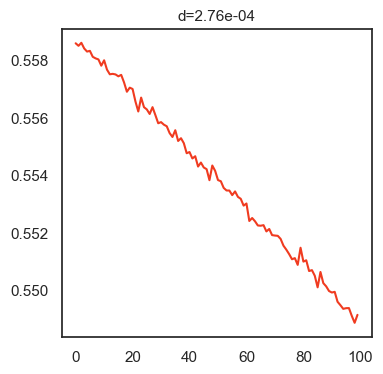

loss = 5.491e-01
time = 6.527 min
Computing laplacian...
Laplacian computed in 2.76 sec
Computing RFA...
RFA computed in 3.57 sec
Starting training...


loss: 0.52635: 100%|██████████████████████████| 100/100 [06:57<00:00,  4.17s/it]

PM computed in 417.43 sec


<Figure size 640x480 with 0 Axes>

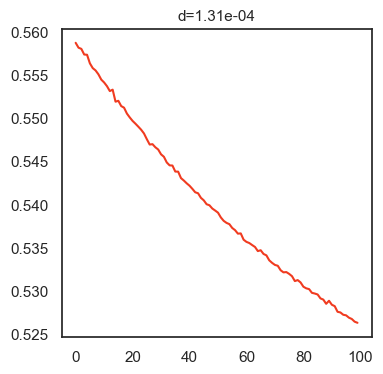

loss = 5.263e-01
time = 6.962 min
Computing laplacian...
Laplacian computed in 2.79 sec
Computing RFA...
RFA computed in 3.78 sec
Starting training...


loss: 0.49767: 100%|██████████████████████████| 100/100 [07:21<00:00,  4.41s/it]

PM computed in 441.21 sec


<Figure size 640x480 with 0 Axes>

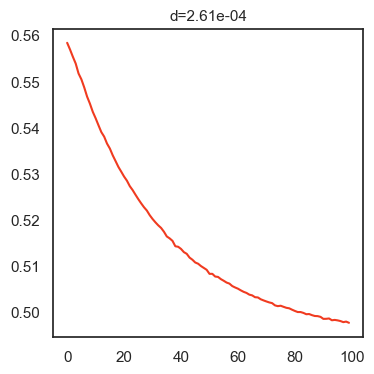

loss = 4.977e-01
time = 7.359 min


<Figure size 640x480 with 0 Axes>

In [19]:
gamma_results = {}
for gamma in [0.5, 1.0, 2.0]:

    poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                                                
                            f"{workdir}/rna_pca.celltype_label.poincare_coord",
                            mode='features', k_neighbours=15, 
                            distlocal='minkowski', sigma=1.0, gamma=gamma,
                            color_dict=celltype_colors, epochs=100,
                            batchsize=16, lr=0.1, earlystop=0.0001, cuda=0)
    gamma_results[gamma] = poincare_coord.copy()

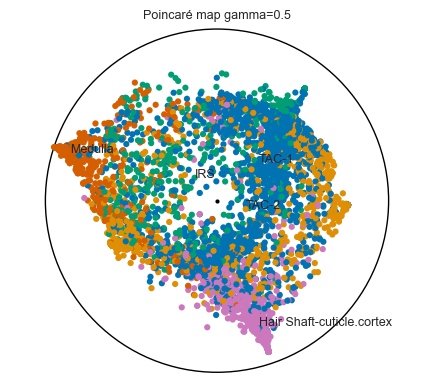

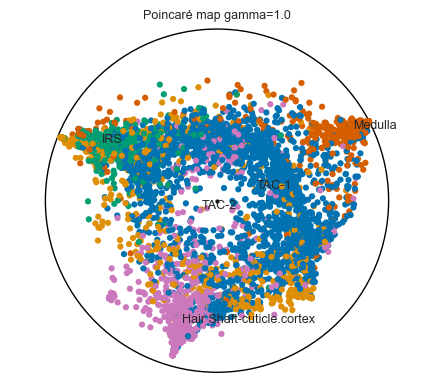

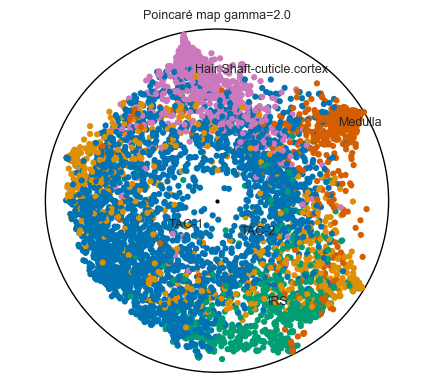

In [21]:
for gamma, poincare_coord in gamma_results.items():
    rna_model = PoincareMaps(poincare_coord)
    rna_model.plot('ori', labels=CG_labels, 
            title_name=f'Poincaré map gamma={gamma}', 
            coldict=celltype_colors, 
            labels_order=None, 
            zoom=4, bbox=(1.1, 0.8), leg=False,)

## Sigmas

Computing laplacian...
Laplacian computed in 3.32 sec
Computing RFA...
RFA computed in 5.08 sec
Starting training...


loss: 0.58979: 100%|██████████████████████████| 100/100 [07:29<00:00,  4.50s/it]


PM computed in 449.72 sec


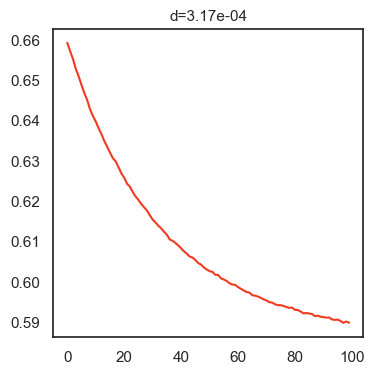

loss = 5.898e-01
time = 7.500 min
Computing laplacian...
Laplacian computed in 3.15 sec
Computing RFA...
RFA computed in 4.42 sec
Starting training...


loss: 0.50207: 100%|██████████████████████████| 100/100 [07:22<00:00,  4.43s/it]

PM computed in 442.59 sec


<Figure size 640x480 with 0 Axes>

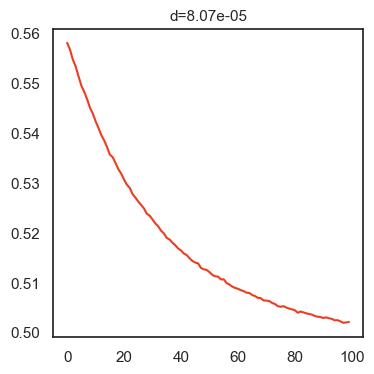

loss = 5.021e-01
time = 7.381 min
Computing laplacian...
Laplacian computed in 2.85 sec
Computing RFA...
RFA computed in 4.43 sec
Starting training...


loss: 0.45986: 100%|██████████████████████████| 100/100 [06:51<00:00,  4.11s/it]

PM computed in 411.35 sec


<Figure size 640x480 with 0 Axes>

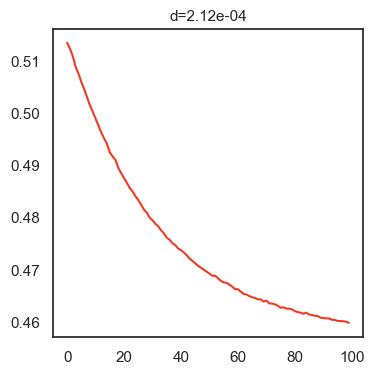

loss = 4.599e-01
time = 6.860 min


<Figure size 640x480 with 0 Axes>

In [22]:
sigma_results = {}
for sigma in [0.5, 1.0, 2.0]:

    poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                                                
                            f"{workdir}/rna_pca.celltype_label.poincare_coord",
                            mode='features', k_neighbours=15, 
                            distlocal='minkowski', sigma=sigma, gamma=2.0,
                            color_dict=celltype_colors, epochs=100,
                            batchsize=16, lr=0.1, earlystop=0.0001, cuda=0)
    sigma_results[sigma] = poincare_coord.copy()

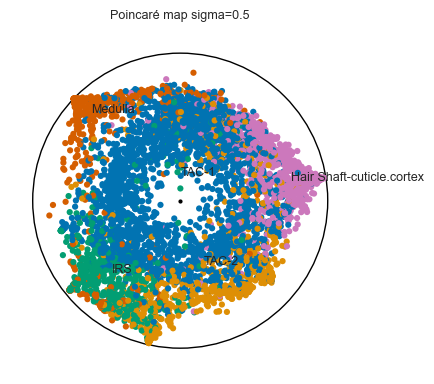

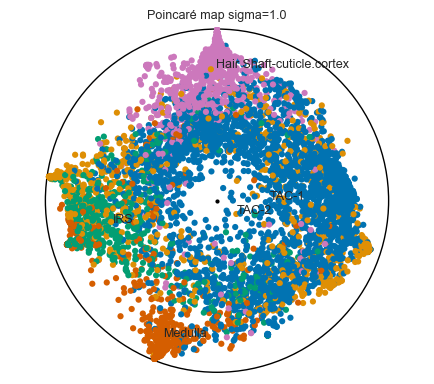

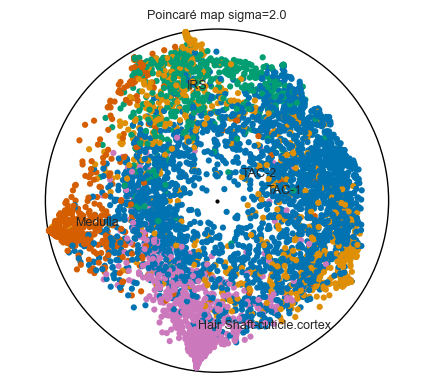

In [23]:
for sigma, poincare_coord in sigma_results.items():
    rna_model = PoincareMaps(poincare_coord)
    rna_model.plot('ori', labels=CG_labels, 
            title_name=f'Poincaré map sigma={sigma}', 
            coldict=celltype_colors, 
            labels_order=None, 
            zoom=4, bbox=(1.1, 0.8), leg=False,)

# K neighbors

Computing laplacian...
Laplacian computed in 3.16 sec
Computing RFA...
RFA computed in 5.45 sec
Starting training...


loss: 2.09334: 100%|██████████████████████████| 100/100 [09:06<00:00,  5.46s/it]

PM computed in 429.49 sec


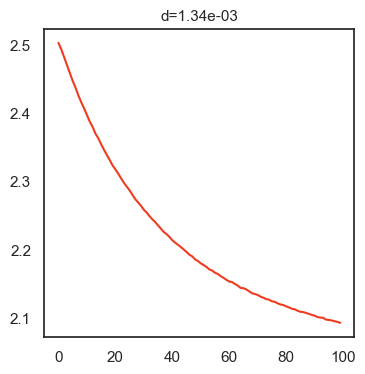

loss = 2.093e+00
time = 7.162 min
Computing laplacian...
Laplacian computed in 2.68 sec
Computing RFA...
RFA computed in 6.37 sec
Starting training...


loss: 0.84969: 100%|██████████████████████████| 100/100 [08:18<00:00,  4.99s/it]

PM computed in 498.65 sec


<Figure size 640x480 with 0 Axes>

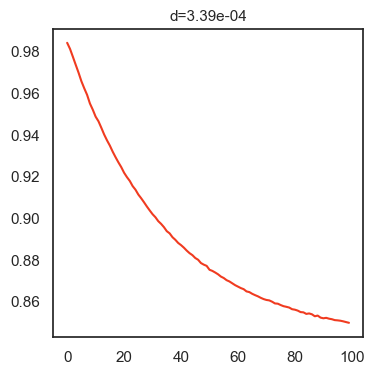

loss = 8.497e-01
time = 8.318 min
Computing laplacian...
Laplacian computed in 3.93 sec
Computing RFA...
RFA computed in 6.95 sec
Starting training...


loss: 0.50395: 100%|██████████████████████████| 100/100 [08:03<00:00,  4.84s/it]

PM computed in 483.83 sec


<Figure size 640x480 with 0 Axes>

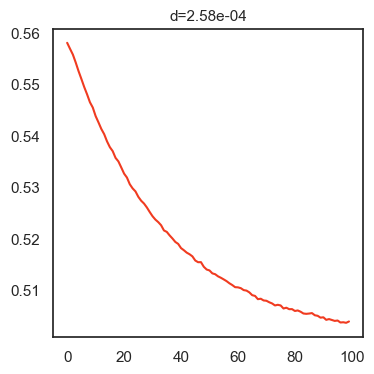

loss = 5.040e-01
time = 8.068 min
Computing laplacian...
Laplacian computed in 2.91 sec
Computing RFA...
RFA computed in 4.29 sec
Starting training...


loss: 0.34310: 100%|██████████████████████████| 100/100 [07:50<00:00,  4.70s/it]

PM computed in 470.29 sec


<Figure size 640x480 with 0 Axes>

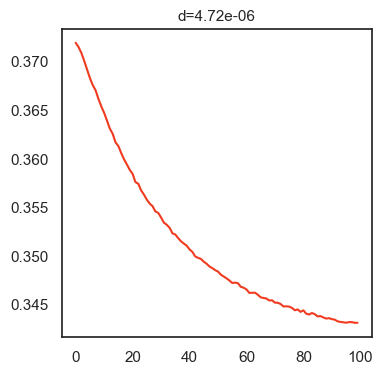

loss = 3.431e-01
time = 7.842 min


<Figure size 640x480 with 0 Axes>

In [24]:
ks_results = {}
for k in [5, 10, 15, 20]:

    poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                                                
                            f"{workdir}/rna_pca.celltype_label.poincare_coord",
                            mode='features', k_neighbours=k, 
                            distlocal='minkowski', sigma=1.0, gamma=2.0,
                            color_dict=celltype_colors, epochs=100,
                            batchsize=16, lr=0.1, earlystop=0.0001, cuda=0)
    ks_results[k] = poincare_coord.copy()

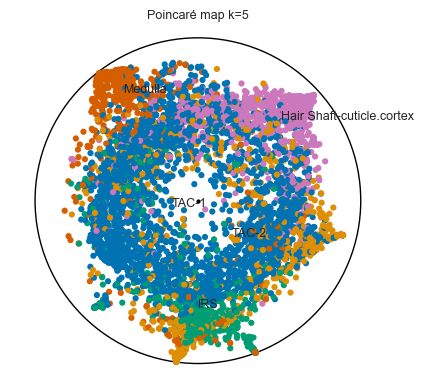

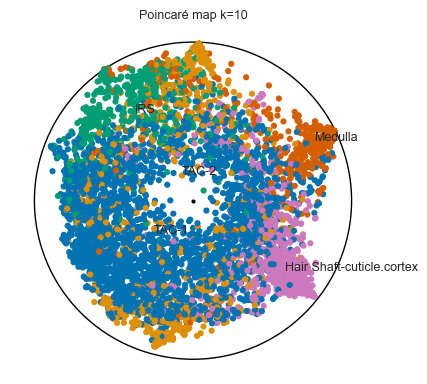

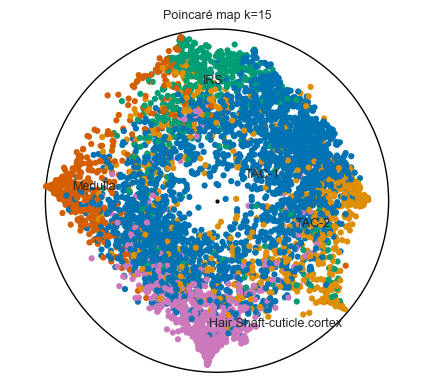

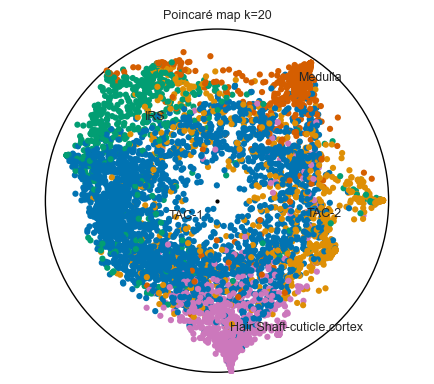

In [28]:
for k, poincare_coord in ks_results.items():
    rna_model = PoincareMaps(poincare_coord)
    rna_model.plot('ori', labels=CG_labels, 
            title_name=f'Poincaré map k={k}', 
            coldict=celltype_colors, 
            labels_order=None, 
            zoom=2, bbox=(1.1, 0.8), leg=False,)

# Different PCs

Computing laplacian...
Laplacian computed in 3.20 sec
Computing RFA...
RFA computed in 4.72 sec
Starting training...


loss: 0.50357: 100%|██████████████████████████| 100/100 [07:09<00:00,  4.30s/it]


PM computed in 429.61 sec


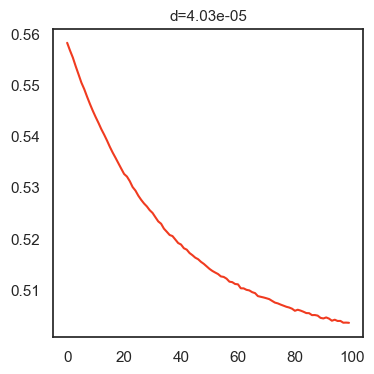

loss = 5.036e-01
time = 7.164 min


<Figure size 640x480 with 0 Axes>

In [15]:
CG_poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                        f"{workdir}/rna_pca.celltype_label.poincare_coord",
                        mode='features', k_neighbours=15, 
                        distlocal='minkowski', sigma=1.0, gamma=2.0,
                        color_dict=celltype_colors, epochs=100,
                        batchsize=16, lr=0.1, earlystop=0.0001, cuda=0)

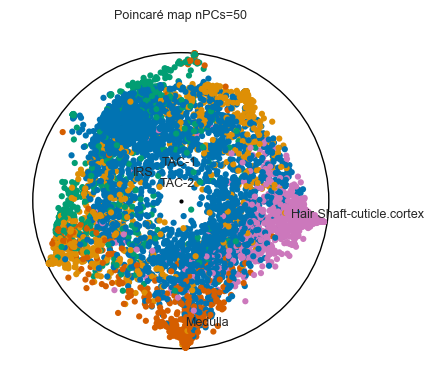

In [16]:
rna_model = PoincareMaps(CG_poincare_coord)
rna_model.plot('ori', labels=CG_labels, file_name=f'{workdir}/rna_pca.celltype_label.poincare_coord', 
           title_name='Poincaré map nPCs=50', 
           coldict=celltype_colors, 
           labels_order=None, 
           zoom=4, bbox=(1.1, 0.8), leg=False, ft='png')

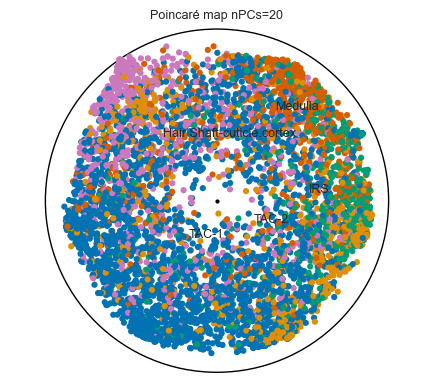

In [13]:
rna_model = PoincareMaps(CG_poincare_coord)
rna_model.plot('ori', labels=CG_labels, file_name=f'{workdir}/rna_pca.celltype_label.poincare_coord', 
           title_name='Poincaré map nPCs=20', 
           coldict=celltype_colors, 
           labels_order=None, 
           zoom=4, bbox=(1.1, 0.8), leg=False, ft='png')

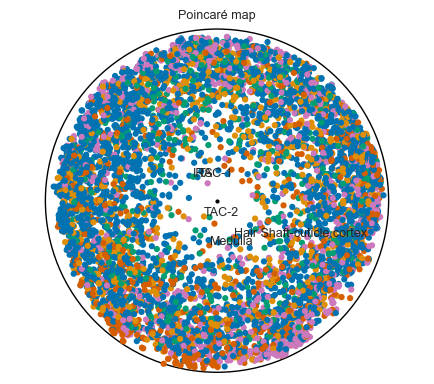

In [9]:
# pc=10
# rna_model = PoincareMaps(CG_poincare_coord)
# rna_model.plot('ori', labels=CG_labels, file_name=f'{workdir}/rna_pca.celltype_label.poincare_coord', 
#            title_name='Poincaré map', 
#            coldict=celltype_colors, 
#            labels_order=None, 
#            zoom=4, bbox=(1.1, 0.8), leg=False, ft='png')